## Projeto de Classificação Supervisionada com Scikit-Learn: Identificação de Vinhos Doces e Secos

Este projeto foi criado para aprender a utilizar modelos supervisionados de classificação do Scikit-Learn, especificamente o RandomForestClassifier, aplicados a um dataset de vinhos. O objetivo foi treinar um modelo capaz de identificar vinhos doces e secos com base em algumas de suas características químicas.

Durante a implementação, foi possível observar que, utilizando os dados disponíveis, a maioria dos vinhos doces apresenta uma intensidade de cor maior em comparação aos vinhos secos. Essa descoberta demonstra uma possível relação entre a doçura de um vinho e sua coloração mais intensa.

O projeto serviu como uma excelente introdução ao uso de algoritmos de aprendizado supervisionado e reforçou a importância da análise exploratória de dados para identificar padrões relevantes.

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
!pip install seaborn
import seaborn as sns

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.94      1.00      0.97        15

    accuracy                           0.98        54
   macro avg       0.97      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



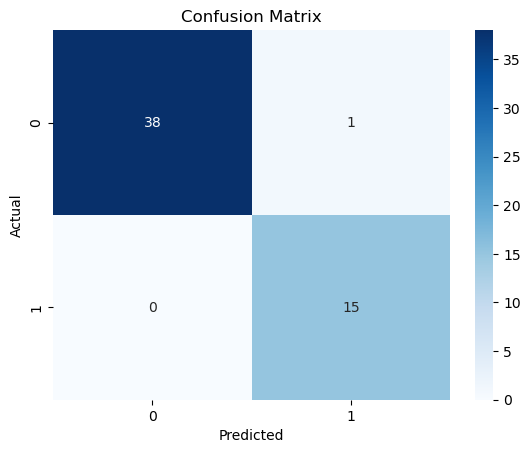

                              Importance
flavanoids                      0.210587
od280/od315_of_diluted_wines    0.183906
hue                             0.182901
color_intensity                 0.102589
malic_acid                      0.095945
total_phenols                   0.070299
proanthocyanins                 0.057753
nonflavanoid_phenols            0.021865
ash                             0.021148
alcalinity_of_ash               0.020849
alcohol                         0.013369
proline                         0.010806
magnesium                       0.007981


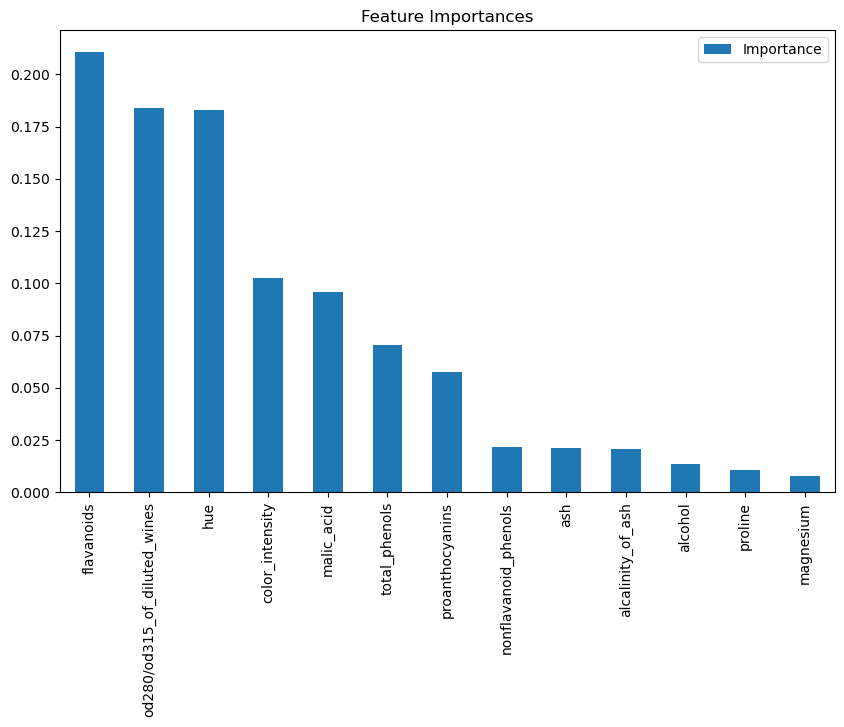

In [120]:

wines = load_wine()

df = pd.DataFrame(wines["data"], columns=wines["feature_names"])
df['target'] = wines.target
df

# Criar um rótulo binário (doce vs seco) como exemplo
# Digamos que 'classe 2' seja mais doce (isso é fictício)
df['sweetness'] = df['target'].apply(lambda x: 1 if x == 2 else 0)

# Dividir em features (X) e label (y)
X = df.drop(['target', 'sweetness'], axis=1)
y = df['sweetness']


# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=178, stratify=y)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo
rf_model = RandomForestClassifier(random_state=178)
rf_model.fit(X_train_scaled, y_train)

# Predições
y_pred = rf_model.predict(X_test_scaled)

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Visualizar as importâncias
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


In [121]:
# Fazer previsões no conjunto de teste
predictions = rf_model.predict(X_test_scaled)

# Converter previsões para um DataFrame para análise
predicted_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions
})

# Exibir os primeiros exemplos
print(predicted_df.head())

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0


In [122]:
# Adicionar as features do X_test para contexto
predicted_df = pd.concat([predicted_df.reset_index(drop=True), 
                          pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)], axis=1)

# Filtrar os vinhos previstos como "doces"
sweet_wines = predicted_df[predicted_df['Predicted'] == 1]

# Exibir vinhos doces
print(sweet_wines)


    Actual  Predicted  alcohol  malic_acid   ash  alcalinity_of_ash  \
0        1          1    14.34        1.68  2.70               25.0   
5        1          1    13.08        3.90  2.36               21.5   
6        1          1    12.85        3.27  2.58               22.0   
11       1          1    13.16        3.57  2.15               21.0   
14       1          1    14.16        2.51  2.48               20.0   
15       1          1    13.48        1.67  2.64               22.5   
20       0          1    12.29        1.61  2.21               20.4   
24       1          1    13.40        4.60  2.86               25.0   
27       1          1    13.36        2.56  2.35               20.0   
28       1          1    13.27        4.28  2.26               20.0   
30       1          1    12.82        3.37  2.30               19.5   
36       1          1    12.86        1.35  2.32               18.0   
39       1          1    13.17        5.19  2.32               22.0   
40    

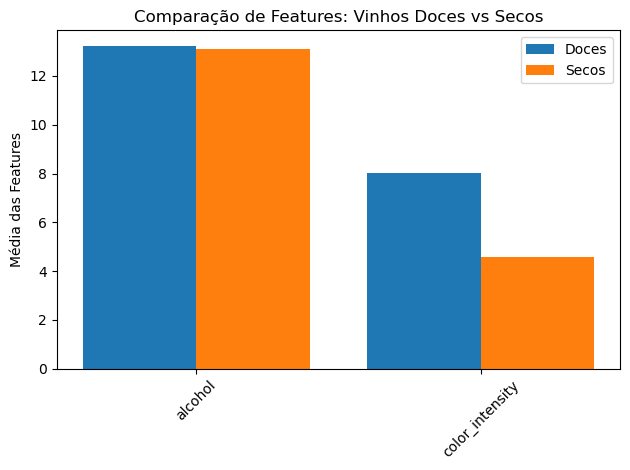

In [123]:
# Separar os vinhos doces e secos
sweet_wines = predicted_df[predicted_df['Predicted'] == 1]
dry_wines = predicted_df[predicted_df['Predicted'] == 0]

# Escolher features para visualização
features_to_plot = ['alcohol', 'color_intensity']

# Calcular as médias para cada grupo
sweet_means = sweet_wines[features_to_plot].mean()
dry_means = dry_wines[features_to_plot].mean()

# Criar gráfico de barras
x = range(len(features_to_plot))
plt.bar(x, sweet_means, width=0.4, label='Doces', align='center')
plt.bar([i + 0.4 for i in x], dry_means, width=0.4, label='Secos', align='center')

# Personalizar o gráfico
plt.xticks([i + 0.2 for i in x], features_to_plot, rotation=45)
plt.ylabel('Média das Features')
plt.title('Comparação de Features: Vinhos Doces vs Secos')
plt.legend()
plt.tight_layout()
plt.show()

In [125]:
#Teste a Correlação Direta: Se o valor for alto (próximo de 1 ou -1), a relação é forte.
correlation = predicted_df[['color_intensity', 'Predicted']].corr()
print(correlation)

                 color_intensity  Predicted
color_intensity         1.000000   0.571491
Predicted               0.571491   1.000000
